In [7]:
import pandas as pd
df = pd.read_csv("C:/Users/ramya/Downloads/customer_booking.csv", encoding='ISO-8859-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [9]:
# Check column names, data types, and non-null counts
df.info()

# Get basic statistics for numerical columns
df.describe()

# Check how many bookings were completed vs not
df['booking_complete'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [15]:
# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'booking_origin'], drop_first=True)

# Confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 117 entries, num_passengers to booking_origin_Vietnam
dtypes: bool(106), float64(1), int64(8), object(2)
memory usage: 9.3+ MB


In [13]:
# Show all column names to verify spelling and formatting
print(df.columns.tolist())

['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'route', 'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete']


In [29]:
# Flag weekend flights (assuming 6 = Saturday, 7 = Sunday)
df['is_weekend'] = df['flight_day'].apply(lambda x: 1 if x in [6, 7] else 0)

# Flag long-haul flights (you can adjust the threshold based on domain knowledge)
df['is_long_haul'] = df['flight_duration'].apply(lambda x: 1 if x >= 5 else 0)

# Create a premium intent score based on customer preferences
df['premium_intent'] = (
    df['wants_extra_baggage'] +
    df['wants_preferred_seat'] +
    df['wants_in_flight_meals']
)

In [27]:
print(df.columns.tolist())

['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'route', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete', 'sales_channel_Mobile', 'trip_type_OneWay', 'trip_type_RoundTrip', 'booking_origin_Afghanistan', 'booking_origin_Algeria', 'booking_origin_Argentina', 'booking_origin_Australia', 'booking_origin_Austria', 'booking_origin_Bahrain', 'booking_origin_Bangladesh', 'booking_origin_Belarus', 'booking_origin_Belgium', 'booking_origin_Bhutan', 'booking_origin_Brazil', 'booking_origin_Brunei', 'booking_origin_Bulgaria', 'booking_origin_Cambodia', 'booking_origin_Canada', 'booking_origin_Chile', 'booking_origin_China', 'booking_origin_Colombia', 'booking_origin_Croatia', 'booking_origin_Cyprus', 'booking_origin_Czech Republic', 'booking_origin_Czechia', 'booking_origin_Denmark', 'booking_origin_Egypt', 'booking_origin_Estonia', 'booking_origin_Finland', 'booking_origin_France', 'booking_origin_Ger

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Define features (X) and target (y)
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# Ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)  # Replace any remaining NaNs with 0

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      8520
           1       0.48      0.15      0.23      1480

    accuracy                           0.85     10000
   macro avg       0.67      0.56      0.57     10000
weighted avg       0.81      0.85      0.82     10000

 Confusion Matrix:
[[8269  251]
 [1252  228]]


C:\Users\ramya\AppData\Local\Temp\ipykernel_6036\3449329967.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


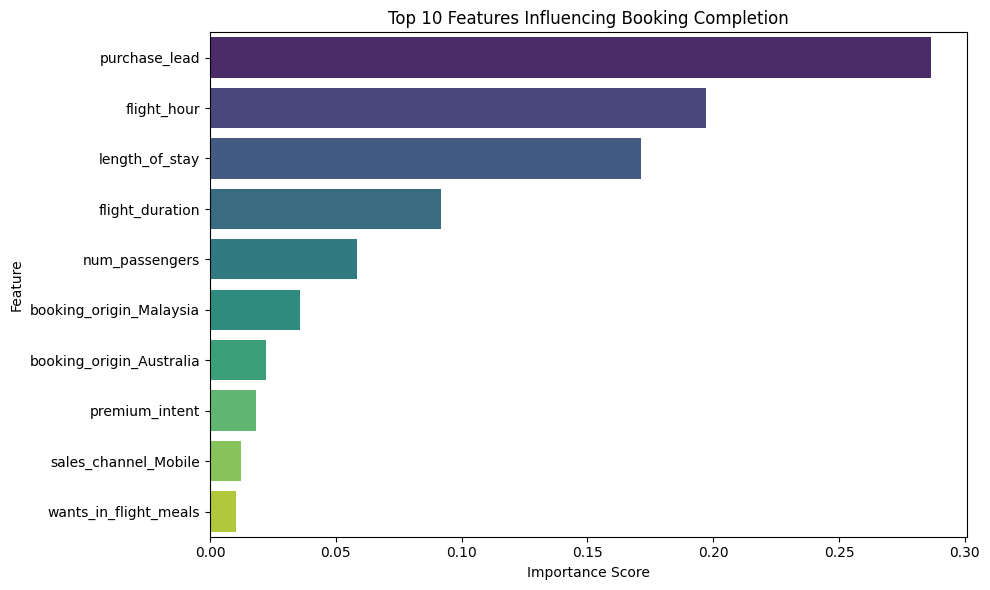

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Predict on test set
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance visualization
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title("Top 10 Features Influencing Booking Completion")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()